<a href="https://colab.research.google.com/github/tanushree2/summer-training/blob/main/Task_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 


In [70]:
df=pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [71]:
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [72]:
df.dtypes


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [73]:
df.columns


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [74]:
df.shape

(614, 13)

In [75]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [76]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [78]:
df["Gender"] = df["Gender"].replace(["Female", "Male"], [1, 0])
df["Gender"] = df["Gender"].replace([np.nan],0)
df["Gender"].unique()

array([0., 1.])

In [79]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [80]:
df["Married"] = df["Married"].replace(["No", "Yes"], [0, 1])
df["Married"] = df["Married"].replace([np.nan],0)
df["Married"].unique()

array([0., 1.])

In [81]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [82]:

df["Dependents"] = df["Dependents"].replace([np.nan, '3+', "1", "2"],[0, 3, 1, 2])
df["Dependents"].unique()



array([0, 1, 2, 3])

In [83]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [84]:
df["Self_Employed"] = df["Self_Employed"].replace(["No", "Yes"], [0, 1])
df["Self_Employed"] = df["Self_Employed"].replace([np.nan],0)
df["Self_Employed"].unique()

array([0., 1.])

In [85]:
df["Self_Employed"].isnull().sum()

0

In [86]:
df["LoanAmount"] = df["LoanAmount"].fillna(method = "ffill")
df["LoanAmount"] = df["LoanAmount"].replace([np.nan],0)
df["LoanAmount"].isnull().sum()

0

In [87]:
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(method = "ffill")
df["Loan_Amount_Term"].unique()

array([360., 120., 240., 180.,  60., 300., 480.,  36.,  84.,  12.])

In [88]:
df["Loan_Amount_Term"].isnull().sum()

0

In [89]:
df["Credit_History"] = df["Credit_History"].replace([np.nan],0)
df["Credit_History"].unique()

array([1., 0.])

In [90]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [91]:
df["Education"].unique()
df["Education"] = df["Education"].replace(["Graduate", "Not Graduate"], [1, 0])
df["Education"].unique()

array([1, 0])

In [92]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [93]:
df["Property_Area"] = df["Property_Area"].replace(["Urban", "Rural", "Semiurban"], [1, 2, 3])
df["Property_Area"].unique()

array([1, 2, 3])

In [94]:
import seaborn as sb

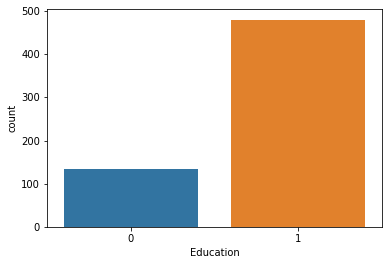

In [95]:
sb.countplot(x = "Education", data = df);

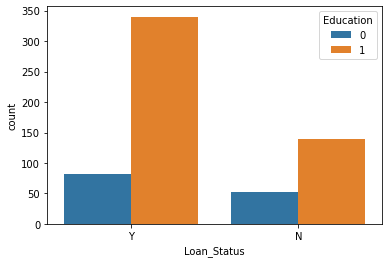

In [96]:
sb.countplot(x = "Loan_Status", hue = "Education", data = df);

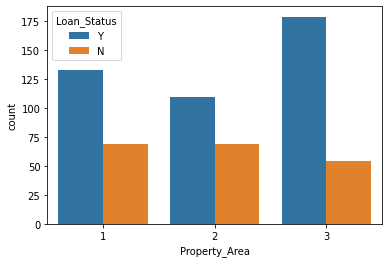

In [97]:
sb.countplot(x = "Property_Area", hue = "Loan_Status", data = df);

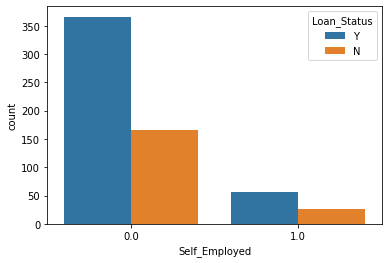

In [98]:
sb.countplot(x = "Self_Employed", hue = "Loan_Status", data = df);

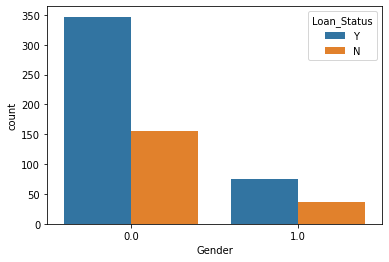

In [99]:
sb.countplot(x = "Gender", hue = "Loan_Status", data = df);

In [100]:
x = df[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]]
y = df["Loan_Status"]

In [101]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 56)
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(460, 11)
(460,)
(154, 11)
(154,)


In [102]:
xtest.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [103]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth = 4)
print(model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [104]:
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)
print(ypred)

['N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'N' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'N' 'N' 'Y' 'N' 'Y' 'N' 'N' 'N' 'Y' 'N' 'Y'
 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N'
 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y'
 'Y' 'Y' 'N' 'N' 'N' 'N' 'N' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y'
 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'N' 'Y' 'N']


In [105]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(ypred, ytest)
print(accuracy*100)

75.32467532467533


In [106]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(ypred, ytest)
print(matrix)

[[25 22]
 [16 91]]


'digraph Tree {\nnode [shape=box] ;\n0 [label="X[9] <= 0.5\\ngini = 0.441\\nsamples = 460\\nvalue = [151, 309]"] ;\n1 [label="X[8] <= 132.0\\ngini = 0.403\\nsamples = 100\\nvalue = [72, 28]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.0\\nsamples = 2\\nvalue = [0, 2]"] ;\n1 -> 2 ;\n3 [label="X[4] <= 0.5\\ngini = 0.39\\nsamples = 98\\nvalue = [72, 26]"] ;\n1 -> 3 ;\n4 [label="X[2] <= 2.5\\ngini = 0.416\\nsamples = 88\\nvalue = [62, 26]"] ;\n3 -> 4 ;\n5 [label="gini = 0.436\\nsamples = 81\\nvalue = [55, 26]"] ;\n4 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 7\\nvalue = [7, 0]"] ;\n4 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 10\\nvalue = [10, 0]"] ;\n3 -> 7 ;\n8 [label="X[6] <= 8.06\\ngini = 0.343\\nsamples = 360\\nvalue = [79, 281]"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n9 [label="X[5] <= 4918.5\\ngini = 0.42\\nsamples = 160\\nvalue = [48, 112]"] ;\n8 -> 9 ;\n10 [label="X[7] <= 123.5\\ngini = 0.486\\nsamples = 79\\nvalue

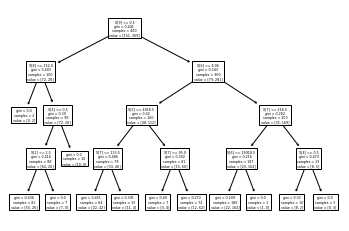

In [107]:
from sklearn import tree
tree.plot_tree(model)
tree.export_graphviz(model)